## 13.6.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
np.random.seed(12)

In [3]:
x = np.random.normal(loc=0, scale=1, size=(10, 100))
x[:, 1:50] = x[:, 1:50] + 0.5

In [4]:
stats.ttest_1samp(x[:, 0], popmean=0)

Ttest_1sampResult(statistic=-1.1808272665876596, pvalue=0.2679357933386311)

In [5]:
def get_p_value(arr):
    return stats.ttest_1samp(arr, popmean=0).pvalue

In [6]:
def get_summary_result(p_value_l, alpha=0.05):
    df_summary = pd.DataFrame({
        'p_value': p_value_l,
        'truth': ['H0 is False'] * 50 + ['H0 is True'] * 50
    })
    df_summary['decision'] = np.where(df_summary.p_value < 0.05, 'Reject H0', 'Do not Reject H0')
    return df_summary[['truth', 'decision']].value_counts().unstack().T


In [7]:
p_value_l = np.array([get_p_value(x[:, i]) for i in range(100)])
get_summary_result(p_value_l)

truth,H0 is False,H0 is True
decision,,
Do not Reject H0,36,48
Reject H0,14,2


In [8]:
x1 = np.random.normal(loc=0, scale=1, size=(10, 100))
x1[:, 1:50] = x1[:, 1:50] + 1
p_value_l = np.array([get_p_value(x1[:, i]) for i in range(100)])
get_summary_result(p_value_l)

truth,H0 is False,H0 is True
decision,,
Do not Reject H0,10,48
Reject H0,40,2


## 13.6.2 The Family-Wise Error Rate

In [9]:
m = np.arange(1, 501, step=1)
len(m)

500

In [10]:
fwe1 = 1 - (1 - 0.05) ** m
fwe2 = 1 - (1 - 0.01) ** m
fwe3 = 1 - (1 - 0.001) ** m

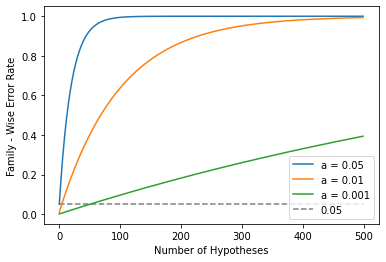

In [11]:
for error_arr, alpha in zip([fwe1, fwe2, fwe3], ['0.05', '0.01', '0.001']):
    plt.plot(error_arr, label=f'a = {alpha}')
plt.hlines(y=0.05,
           xmin=0,
           xmax=500,
           linestyles='--',
           color='gray',
           label='0.05')
plt.legend()
plt.xlabel('Number of Hypotheses')
plt.ylabel('Family - Wise Error Rate')
plt.show()

In [12]:
df_fund = pd.read_csv('../data/fund.csv')
df_fund_mini = df_fund.iloc[:, 0:5]

In [13]:
stats.ttest_1samp(df_fund_mini.iloc[:, 0].values, popmean=0)

Ttest_1sampResult(statistic=2.8603877677367766, pvalue=0.00620235548553822)

In [14]:
p_value_l = []
for i in range(5):
    test_result = stats.ttest_1samp(df_fund_mini.iloc[:, i].values, popmean=0)
    p_value_l.append(test_result.pvalue)

In [15]:
p_value_l

[0.00620235548553822,
 0.918271151651412,
 0.011600982682500436,
 0.6005396008061638,
 0.7557815084668175]

In [16]:
_, p_vals_corrected_bon, _, _ = multipletests(p_value_l, method='bonferroni')
p_vals_corrected_bon

array([0.03101178, 1.        , 0.05800491, 1.        , 1.        ])

In [17]:
_, p_vals_corrected_holm, _, _ = multipletests(p_value_l, method='holm')
p_vals_corrected_holm

array([0.03101178, 1.        , 0.04640393, 1.        , 1.        ])